In [1]:
from train import Trainer
from generate_visuals import generate_heatmaps, generate_bar_graph, generate_tsne_clusters, generate_confusion_matrix
import numpy as np

## ReLU Activation and Various hyperparameter combinations

In [2]:
trainer = Trainer()
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

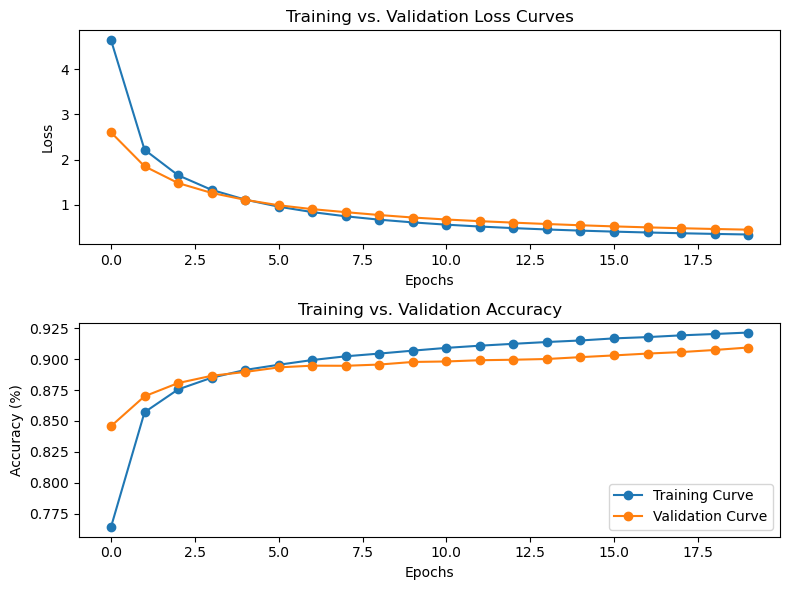

In [3]:
trainer.generate_plots()

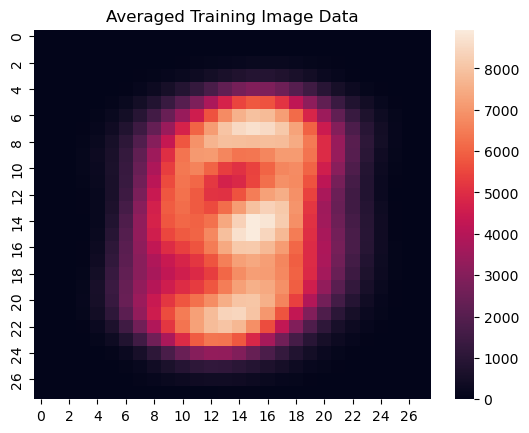

In [4]:
generate_heatmaps(
    trainer.raw_image_map.reshape((28, 28)),
    "Averaged Training Image Data",
)

In [5]:
### As we see in the aggregated image data above, it is clear that there is correlation between different features.
### While I have tested using L1 regularization, L2 is the better option here due to the correlated nature of these pixels.

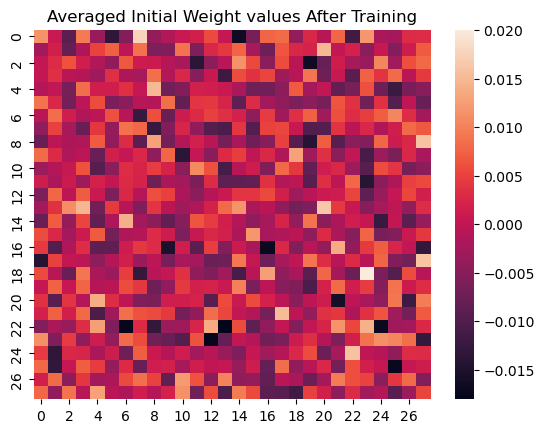

In [6]:
generate_heatmaps(
    np.average(trainer.initial_weight_values_w1, axis=1).reshape((28, 28)),
    "Averaged Initial Weight values After Training",
)

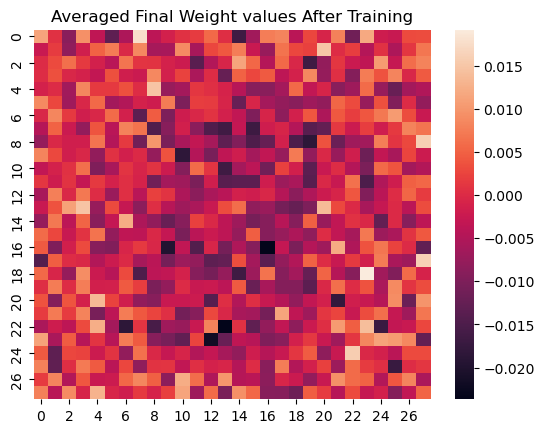

In [7]:
generate_heatmaps(
    np.average(trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

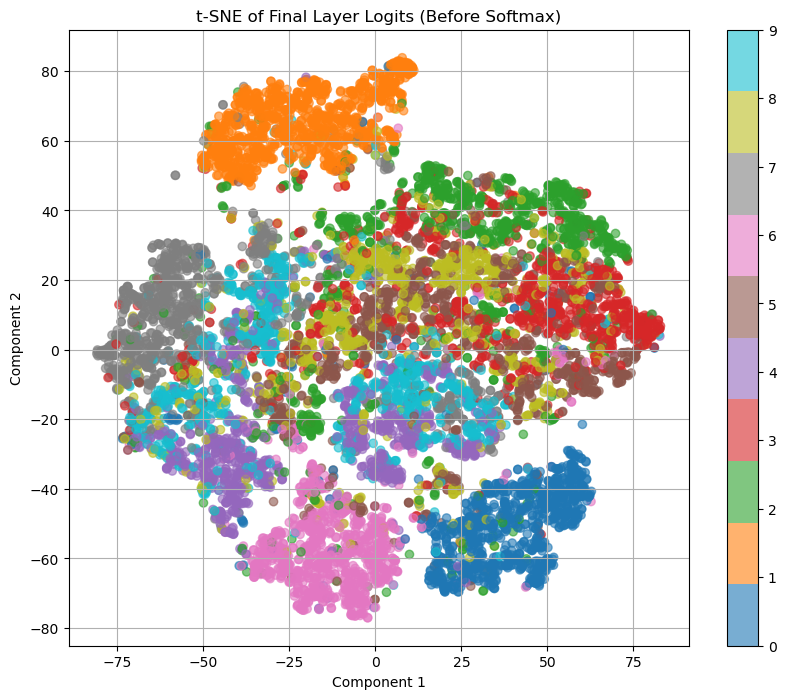

In [8]:
generate_tsne_clusters(trainer)

In [9]:
trainer = Trainer("configs/config_lr_1e-4.yaml")
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

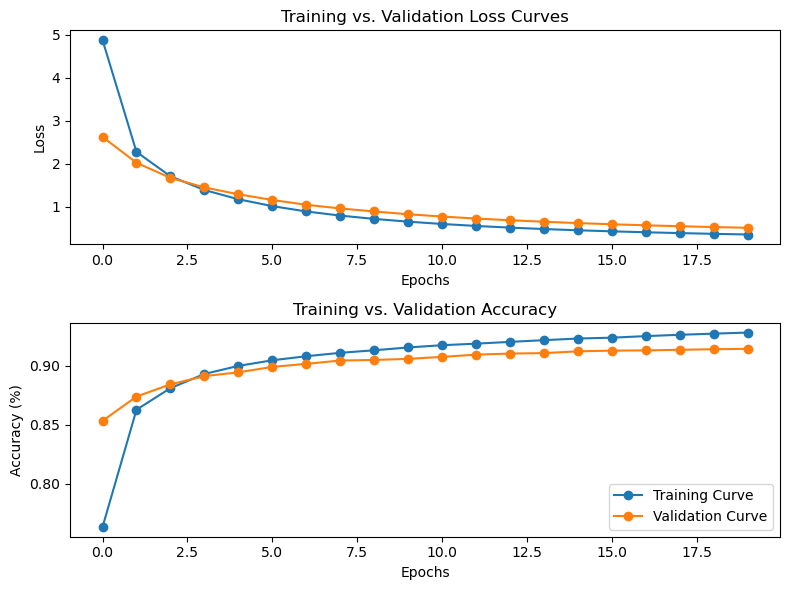

In [10]:
trainer.generate_plots()

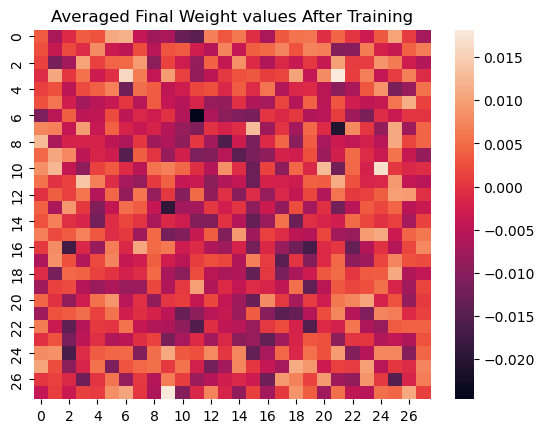

In [11]:
generate_heatmaps(
    np.average(trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

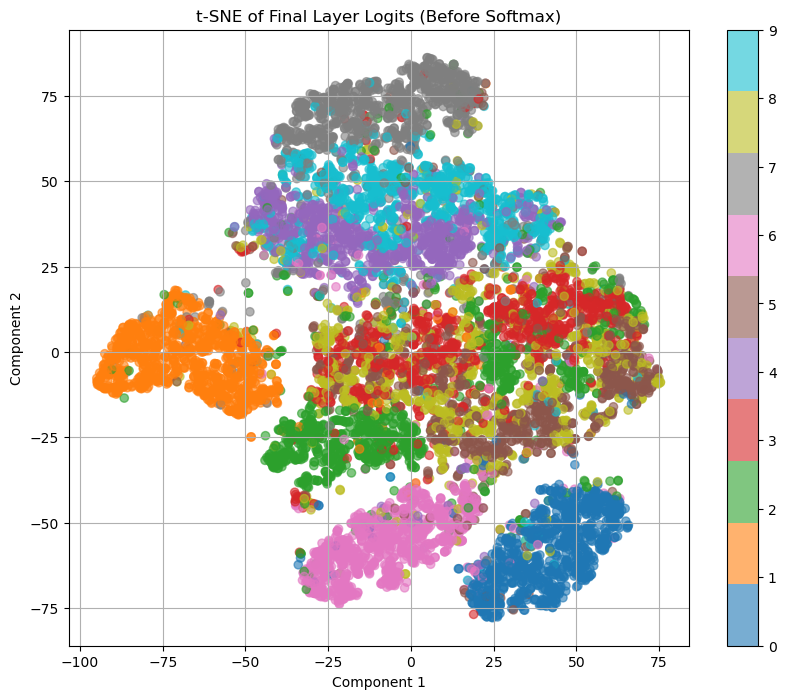

In [12]:
generate_tsne_clusters(trainer)

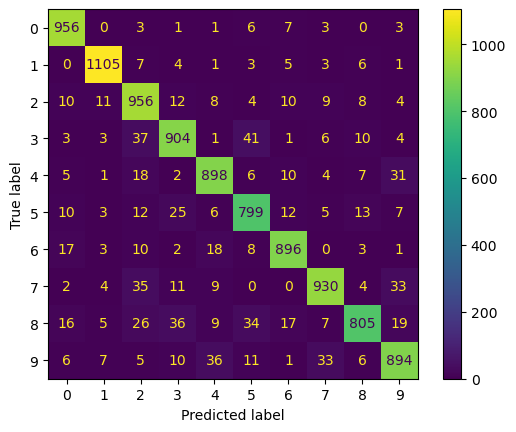

In [13]:
generate_confusion_matrix(trainer)

## Sigmoid Activation and Various hyperparameter combinations

In [14]:
trainer = Trainer(activation="sigmoid")
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

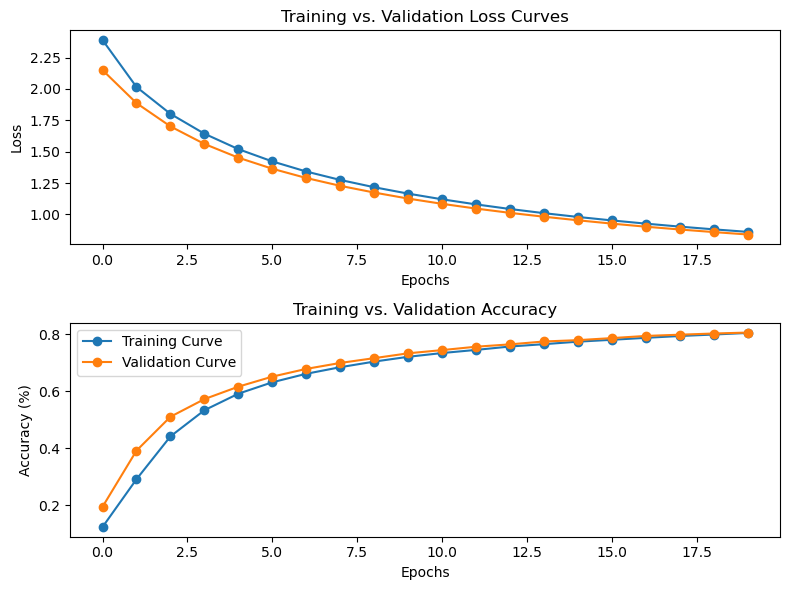

In [15]:
trainer.generate_plots()

## Best Hyperparameter combination for both activation functions

In [16]:
sig_trainer = Trainer(config_file_name="configs/config_sig.yaml", activation="sigmoid")
sig_trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

/Users/akshayd/Projects/neural-networks-python/utilities/sigmoid.py:10: RuntimeWarning: overflow encountered in power
  return 1 / (1 + math.e ** (-x))


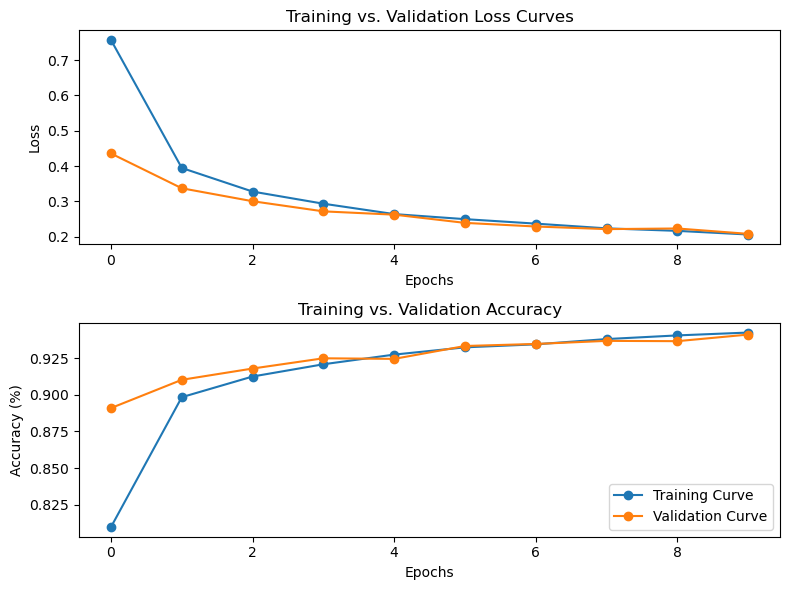

In [17]:
sig_trainer.generate_plots()

In [18]:
relu_trainer = Trainer(config_file_name="configs/config_relu.yaml")
relu_trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

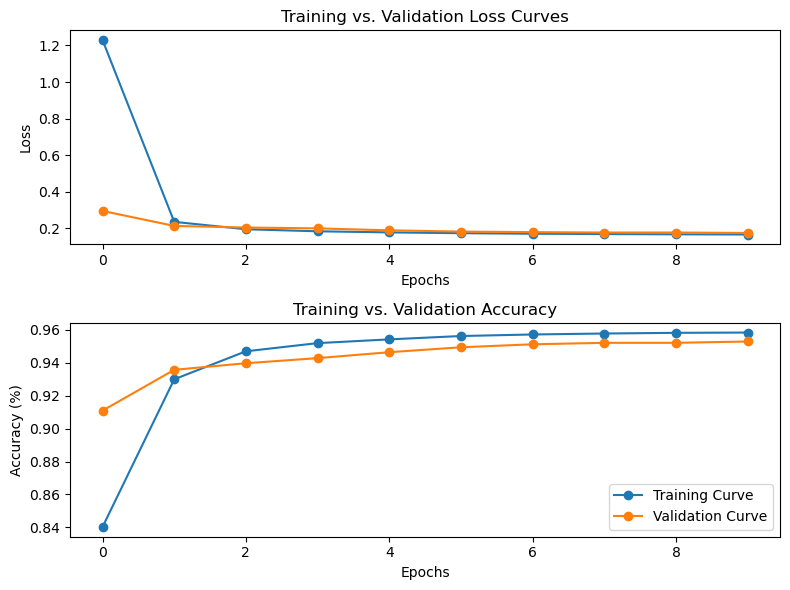

In [19]:
relu_trainer.generate_plots()

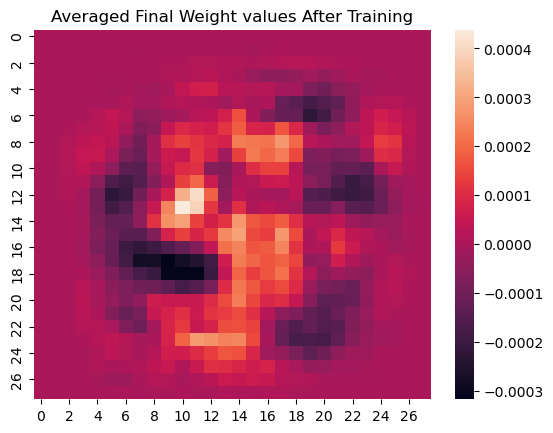

In [20]:
generate_heatmaps(
    np.average(relu_trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

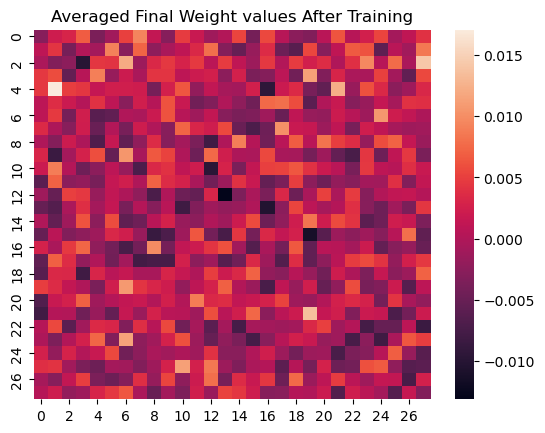

In [21]:
generate_heatmaps(
    np.average(sig_trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

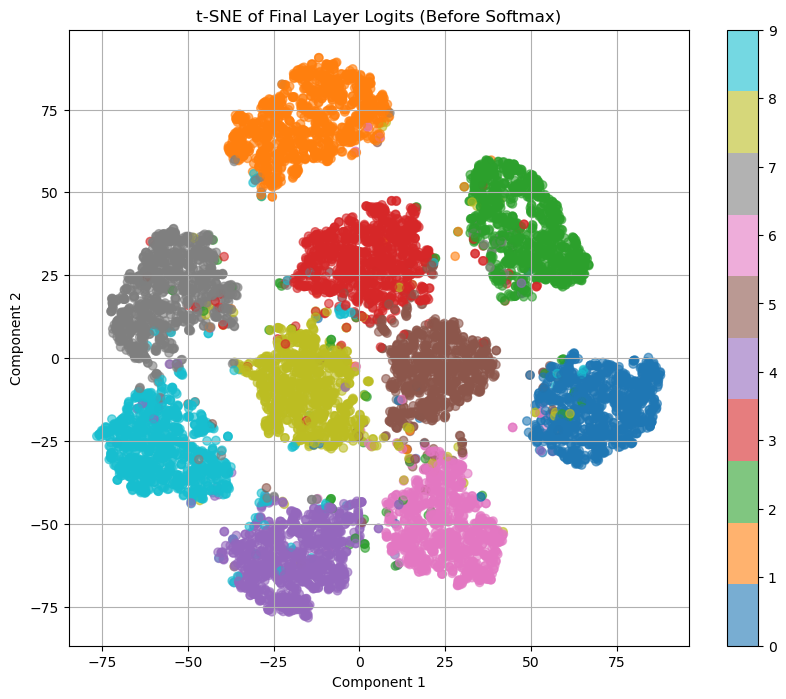

In [22]:
generate_tsne_clusters(relu_trainer)

/Users/akshayd/Projects/neural-networks-python/utilities/sigmoid.py:10: RuntimeWarning: overflow encountered in power
  return 1 / (1 + math.e ** (-x))


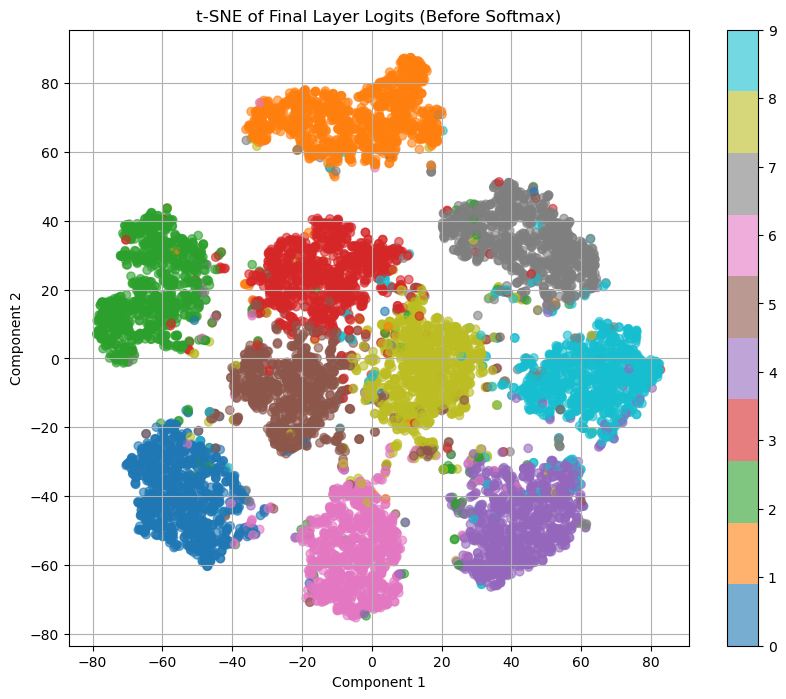

In [23]:
generate_tsne_clusters(sig_trainer)

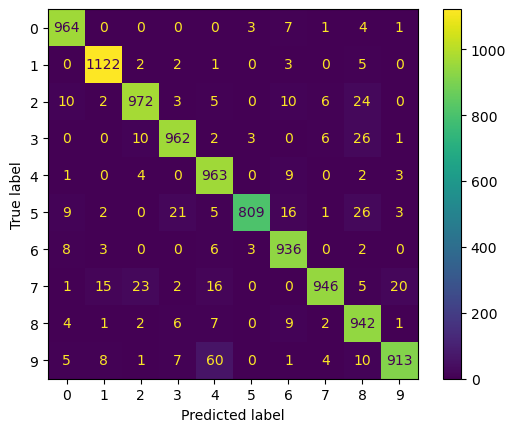

In [24]:
generate_confusion_matrix(relu_trainer)

## Testing using Momentum

In [33]:
momentum_trainer = Trainer(config_file_name="configs/config_momentum.yaml")
momentum_trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

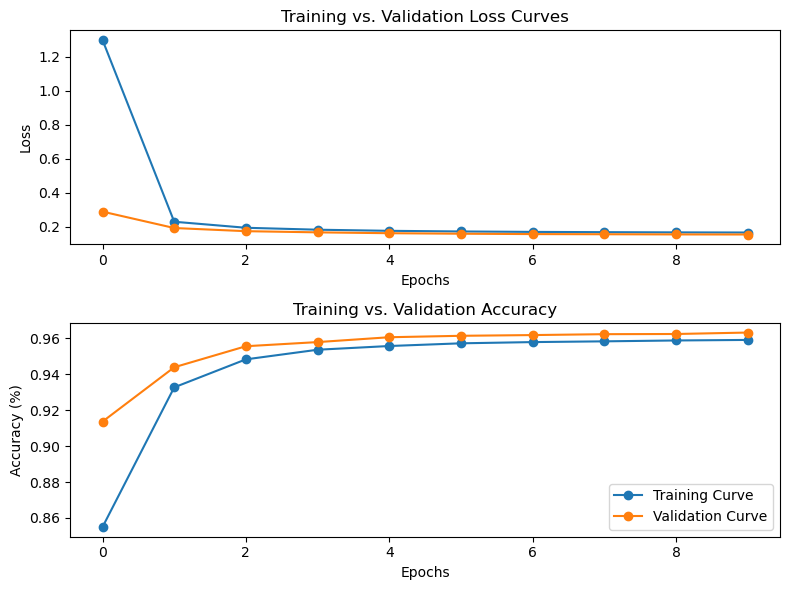

In [34]:
momentum_trainer.generate_plots()

In [35]:
relu_trainer.validation_accuracy_across_epochs

[np.float64(0.9109),
 np.float64(0.9357),
 np.float64(0.9397),
 np.float64(0.9428),
 np.float64(0.9464),
 np.float64(0.9494),
 np.float64(0.9512),
 np.float64(0.9521),
 np.float64(0.9521),
 np.float64(0.9529)]

In [36]:
momentum_trainer.validation_accuracy_across_epochs

[np.float64(0.9136),
 np.float64(0.9438),
 np.float64(0.9555),
 np.float64(0.9578),
 np.float64(0.9605),
 np.float64(0.9613),
 np.float64(0.9617),
 np.float64(0.9622),
 np.float64(0.9623),
 np.float64(0.9631)]

In [ ]:
## Final Accuracy of MNIST on validation dataset is ~96% using ReLU, L2, and SGD Momentum Optimizer